### Proyecto 1 (Compiladores)

David Antonio Garzón Avendaño

David Esteban Casallas Menenses 

In [36]:
import sys
import graphviz as gr
import matplotlib
from IPython.display import display

sys.setrecursionlimit(15000)

## Conversion de Expresiones regulares a Postfix

Para crear un DFA que acepte cualquier expresión regular, es necesario primero pasar dicha espresión regular a postfix, para ello es necesario primero añadir un simbolo que represente la concatenación entre dos símbolos y operaciones "OR" dentro de las llaves cuadradas, y luego se pasa a postfix dicha expresión usando un stack, un diccionario con prioridades y una lista de los símbolos que se usan como operadores.

Para esto se diseñaron dos funciones, la primera es "Hakufu_Sonsaku()", que se encarga de añadir los signos de concatenación e interpretar las operaciones que hay dentro de las llaves cuadradas, como por ejemplo \[ A-Z+\], en donde se acepta cualquier letra mayúscula o un símbolo +.
La segúnda funcion se llama "infix_to_postfix()", y ejecuta el algoritmo para pasar una expresión de infix a posfix con un stack (no nos detendremos en este algoritmo debido a que es bastante básico y se ha trabajado en cursos previos) 

In [37]:
def is_alphabet(c):
  prior = {'*': 3, '+': 3, '?': 2, "|":2 ,'(': 0, ')':0, '[':0, ']':0}
  boolean = (c not in prior.keys()) and c != ''
  return boolean

def Hakufu_Sonsaku(reg_exp, debug = False):
  flag = 0
  range_mode = False
  par_mode = False
  reg_exp_list = [*reg_exp]
  limit = len(reg_exp_list)
  new_reg_exp = ""

  for i in range(limit):
    reg_exp_l = [*new_reg_exp]
    if i > 0:
      prev_char = reg_exp_list[i-1]
    else:
      prev_char = ''
    
    if i < limit - 1:
      next_char = reg_exp_list[i+1]
    else:
      next_char = ''

    current_char =  reg_exp_list[i]
    if debug:
      print("my next", next_char)
      print()
      print("LOOP ----------")
      print("Prev char: {}, current_char: {}, next_char: {} ".format(prev_char, current_char, next_char))
      print(is_alphabet(current_char))
      print(range_mode)
      print(new_reg_exp)
      print(flag)

    #Diversos casos para añadir unio o or 
    if flag == 0:
      if (prev_char == ')' or prev_char == ']' or is_alphabet(prev_char) or prev_char == '*' or prev_char == '+' or prev_char == '?') and (current_char == '(' or current_char == '[' or is_alphabet(current_char)):
        new_reg_exp += "#"
      new_reg_exp += current_char
      if debug:
        print("EXECUTE -1 -------")
        print(new_reg_exp)

    else:  
      if current_char == '-' or next_char == '-':
        range_mode = True
        new_reg_exp += current_char
        if debug:
          print("EXECUTE 1 -------")
          print(new_reg_exp)

      elif not par_mode and (is_alphabet(current_char)) and (is_alphabet(next_char)) and next_char != ']' and prev_char != "-":
        new_reg_exp += current_char 
        new_reg_exp += "|"
        if debug:
          print("EXECUTE 2.5 -------")
          print(new_reg_exp)

      elif current_char == "(":
        par_mode = True
        new_reg_exp += current_char
      
      elif current_char == ")":
        par_mode = False
        new_reg_exp += current_char
        new_reg_exp += "|"

      elif not range_mode and reg_exp_l[-1] != "|" and next_char != '-' and (prev_char == ')' or is_alphabet(prev_char) or prev_char == '*' or prev_char == '+' or prev_char == '?') and (current_char != "|" and prev_char != "|" and prev_char != '-') and (current_char == '('  or (is_alphabet(current_char))):
        new_reg_exp += "#"
        new_reg_exp += current_char
        if debug:
          print("EXECUTE 2 -------")
          print(new_reg_exp)
      
      elif range_mode and not par_mode and (is_alphabet(current_char) and is_alphabet(prev_char) and next_char != ']'):
        new_reg_exp += current_char
        new_reg_exp += "|"
        range_mode = False
        if debug:
          print("EXECUTE 3 -------")
          print(new_reg_exp)
      
      elif (current_char == '[' and  prev_char == ']') or (current_char == '(' and  prev_char == ']') or (
          current_char == '(' and  prev_char == ')') or (current_char == '[' and  prev_char == ')'):
        new_reg_exp += "|"
        new_reg_exp += current_char
        range_mode = False
        if debug:
          print("EXECUTE 4 -------")
          print(new_reg_exp)
      
      elif prev_char == ")" and next_char == "-":
        new_reg_exp += "|"
        new_reg_exp += current_char
        if debug:
          print("EXECUTE 5 -------")
          print(new_reg_exp)

      else:
        new_reg_exp += current_char
        if debug:
          print("EXECUTE 6 -------")
          print(new_reg_exp)

    if current_char == '[':
      flag -= 1

    if current_char == ']':
      flag += 1 

  return new_reg_exp 

OPERATORS = set(['|','(', ')','#', '[',']', '-'])  # Operadores usados
PRIORITY = {'|':1, '#':2, '-': 3} # Prioridades de las operaciones 
def infix_to_postfix(expression):

    stack = [] # stack 
    output = '' # cadena
    for ch in expression:
        if ch not in OPERATORS: # Si no es un operador se pode en output
            output+= ch
        elif ch=='(':  
            stack.append('(')
        elif ch=='[':  
            stack.append('[')
        elif ch==')':
            while stack and stack[-1]!= '(':
                output+=stack.pop()
            stack.pop()
        elif ch==']':
            while stack and stack[-1]!= '[':
                output+=stack.pop()
            stack.pop()
        else:
            #Los operadores de menor prioridad no pueden estar arriba de 
            #uno de mayor prioridad en la pila, por lo que se ponen en el output
            while stack and stack[-1]!='(' and stack[-1]!='[' and PRIORITY[ch]<=PRIORITY[stack[-1]]:
                output+=stack.pop()
            stack.append(ch)
    while stack:
        output+=stack.pop()
    return output


In [38]:
#EJEMPLO DE USO

print(Hakufu_Sonsaku('[a-z][a-z]'))
print(Hakufu_Sonsaku('[(ab) a-z0-9(ab)]'))
print(infix_to_postfix(Hakufu_Sonsaku("[a-z][a-z]")))

[a-z]#[a-z]
[(a#b)| |a-z|0-9|(a#b)|]
az-az-#


## Creación de un Automata NFA usando clases

El siguiente paso para crear un DFA es crear un NFA usando el algoritmo de thompson. Para esto tendremos dos clases, la clase "nodos" y la clase "NFA_2", dentro de la clase NFA_2 se crean nodos usando una función privada, dicha función privada es llamada a su vez por los metodos:

* simbol(): Crea un automata que acepta un solo símbolo
* concat_op(): Concatena dos automatas previamente creados, está función usa un stack interno del objeto para unir dichos automatas
*  or_op(): Crea un automata que acepta el lenguaje de dos automatas previamente creados, está función usa un stack interno del objeto para unir dichos automatas en uno solo que acepta ambos lenguajes. 
* Kleenex(): Crea un automata que acepta la estrella de Kleen del lenguaje aceptado por un automata previamente creado 
* Kleenex_plus(): Crea un automata que acepta la estrella de Kleen  del lenguaje aceptado por un automata previamente creado sin aceptar la cadena vacia.  

Note que varias de estas funciones requieren que se creen primero el o los automatas que se van a operar, por lo que tener la expresión regular en postfix es conveniente. 

Además definimos la funcíon draw() que se usa para graficar el NFA y verificar que sea el correcto. 


In [39]:
#Automata 

class node:
  def __init__(self,number,aceptation, conections = {}) -> None:
    self.conections = conections
    self.name = number 
    self.aceptation = aceptation
    

class NFA_2:
  def __init__(self) -> None:
    self.closure = dict()
    self.epsilon = 0
    self.enum = 0  
    self.last_node = 0
    self.first_node = 0
    self.nodes = dict() #Dicionario con el nombre de los automatas 
    self.nodes_clusters = [] 
    self.clusters_star_node = [] #Nodos de incio
    self.clusters_end_node = [] #Nodos de final
    self.readed = [] #Array para guardar los simbolos leidos
  
  #Funcion Para crear un nodo con identificador unico 
  def __create_node(self,acceptaion,conections,node_clust) -> None:
    shinji = node(self.enum,acceptaion,conections)
    self.nodes[self.enum] = shinji
    node_clust[self.enum] = shinji
    self.enum += 1
    return self.enum -1
    
  #Funcion para crear un automata que acepte un solo simbolo
  #Esta función tiene en cuenta qué pasa si se pide que se acepte solo 
  # la cadena vacia 
  def simbol(self,string) -> None:
    if string != "":
      self.node_clust = dict()
      self.clusters_star_node.append(self.enum)
      self.clusters_end_node.append(self.enum+1)
      self.__create_node(False, {string:self.enum+1} , self.node_clust)
      self.__create_node(True, dict() , self.node_clust)
      self.nodes_clusters.append(self.node_clust)
      self.readed.append(string)
      #print(self.node_clust)
      #print(self.clusters_star_node) 
    else: 
      self.node_clust = dict()
      self.clusters_star_node.append(self.enum)
      self.clusters_end_node.append(self.enum)
      self.__create_node(True, dict() , self.node_clust)
      self.nodes_clusters.append(self.node_clust)
      self.readed.append(string)
      #print(self.node_clust)
      #print(self.clusters_star_node) 

  #Concatena los dos ultimos automatas
  def concat_op(self):
    clust_1 = self.nodes_clusters[-1]
    clust_2 = self.nodes_clusters[-2]
    clust_1_start = self.clusters_star_node[-1]
    clust_2_start = self.clusters_star_node[-2]
    clust_1_end = self.clusters_end_node[-1]
    clust_2_end = self.clusters_end_node[-2]

    start = clust_2_start
    #print(start)
    state_clust_1 = list(clust_1.values())
    state_clust_2 = list(clust_2.values())

    #shini_state = clust_2_end
    #new_state =

    shini_state = clust_2_end
    new_state = clust_1_start
  
    for nodes in clust_2.values():
      for my_key in nodes.conections.keys():
        if nodes.conections[my_key] == shini_state:
          nodes.conections[my_key] = new_state
    
    self.first_node = state_clust_1[0].name 
    clust_2.update(clust_1)
    del clust_2[shini_state]
    del self.nodes[shini_state]

    self.clusters_star_node.pop(-1)
    self.clusters_star_node.pop(-1)
    self.clusters_end_node.pop(-2)

    self.clusters_star_node.append(start)

    self.nodes_clusters.pop(-1)
    self.nodes_clusters.pop(-1)
    self.nodes_clusters.append(clust_2)
    
    #print(self.clusters_star_node)

  #Hace la union los dos ultimos automatas
  def or_op(self):
    self.node_clust = dict()
    clust_1 = self.nodes_clusters[-1]
    clust_2 = self.nodes_clusters[-2]
    state_clust_1 = list(clust_1.values())
    state_clust_2 = list(clust_2.values())

    clust_1_start = state_clust_1[0]
    clust_1_end = state_clust_1[-1]
    clust_2_start = state_clust_2[0]
    clust_2_end = state_clust_2[-1]

    new_start_node = self.__create_node(False, 
    {"ε" + str(self.epsilon) : clust_1_start.name  , 
     "ε"+ str(self.epsilon + 1) : clust_2_start.name} ,self.node_clust )
    
    self.epsilon += 2
    new_end_node = self.__create_node(True, dict() ,self.node_clust)


    for nodes in clust_2.values():
      if nodes.aceptation == True:
        nodes.conections["ε" + str(self.epsilon)] = new_end_node
        nodes.aceptation = False
        self.epsilon += 1  

    for nodes in clust_1.values():
      if nodes.aceptation == True:
        nodes.conections["ε" + str(self.epsilon)] = new_end_node
        nodes.aceptation = False
        self.epsilon += 1
    
    self.clusters_star_node.pop(-1)
    self.clusters_star_node.pop(-1)
    self.clusters_end_node.pop(-1)
    self.clusters_end_node.pop(-1)

    self.clusters_star_node.append(new_start_node)
    self.clusters_end_node.append(new_end_node)

    self.node_clust.update(clust_2)
    self.node_clust.update(clust_1)
    self.nodes_clusters.pop(-1)
    self.nodes_clusters.pop(-1)
    self.nodes_clusters.append(self.node_clust)
    #print(self.clusters_star_node)

  # Hace estrella de kleen del último automata 
  def kleenex(self):
    self.node_clust = dict()
    clust_1 = self.nodes_clusters[-1]
    state_clust_1 = list(clust_1.values())
    clust_1_start = state_clust_1[0]
    clust_1_end = state_clust_1[-1]

    new_start_node = self.__create_node(False, dict(), self.node_clust )
    new_end_node = self.__create_node(True, dict(),self.node_clust) 

    self.nodes[new_start_node].conections = {"ε" + 
    str(self.epsilon) : clust_1_start.name,"ε" + str(self.epsilon + 1) : new_end_node}  

    self.epsilon += 2
    
    for nodes in clust_1.values():
      if nodes.aceptation == True:
        nodes.conections["ε" + str(self.epsilon)] = new_end_node
        nodes.conections["ε" + str(self.epsilon + 1)] = clust_1_start.name
        nodes.aceptation = False
        self.epsilon += 2    

    self.clusters_star_node.pop(-1)
    self.clusters_end_node.pop(-1)
    self.clusters_star_node.append(new_start_node)
    self.clusters_end_node.append(new_end_node)

    #print("start",self.clusters_star_node)
    #print("end",self.clusters_end_node)

    self.nodes_clusters.pop(-1)
    self.node_clust.update(clust_1)
    self.nodes_clusters.append(self.node_clust)
    #print(self.clusters_star_node)

  # Hace estrella de kleen más del último automata
  def kleenex_plus(self):
    self.node_clust = dict()
    self.node_clust_2 = dict()
    copy_nodes = [] 
    temp_dict = dict()
    clust_1 = self.nodes_clusters[-1]
    state_clust_1 = list(clust_1.values())
    #print(self.clusters_star_node, self.clusters_end_node)

    for node in clust_1:
      penpen = self.__create_node(self.nodes[node].aceptation, 
      self.nodes[node].conections.copy(), self.node_clust_2)
      copy_nodes.append(penpen)
      temp_dict[self.nodes[node].name] = penpen

    self.clusters_star_node.append(temp_dict[self.clusters_star_node[-1]])
    self.clusters_end_node.append(temp_dict[self.clusters_end_node[-1]])

   
    for node in self.node_clust_2:
      for info in self.nodes[node].conections.keys():

        self.nodes[node].conections[info] = temp_dict[self.nodes[node].conections[info]]
 

    self.nodes_clusters.append(self.node_clust_2)
    #print(self.nodes_clusters)
    #print(self.clusters_star_node)
    #print(self.clusters_star_node, self.clusters_end_node)

    self.kleenex()
    self.concat_op()

  #Funcion que calcula la epsilon clausura
  def epsilon_closure(self):
    for node in self.nodes.values(): 
      self.closure[node.name] = set()
      for i in node.conections.keys():
        if i[0] == "ε":
          self.closure[node.name].add(node.conections[i])
    
    change = True 

    while change:
      change = False 
      for state_closure in self.closure.keys():
        size = len(self.closure[state_closure])
        if size > 0:
          for i in self.closure[state_closure]:
            if len(self.closure[i]) > 0:
              self.closure[state_closure] = self.closure[state_closure].union(self.closure[i])
        size2 = len(self.closure[state_closure])
        if size2 > size:
          change = True 

    return self.closure

  #Crea el automata que acepta un rango entre corchetes [A-Z]
  def letters_range(self):
    self.nodes_clusters.pop(-1)
    self.nodes_clusters.pop(-1)
    self.clusters_star_node.pop(-1)
    self.clusters_star_node.pop(-1)
    self.clusters_end_node.pop(-1)
    self.clusters_end_node.pop(-1)
    #print(self.clusters_star_node)
    if len(self.clusters_star_node) == 0:
      self.clusters_star_node.append(0)

    letter_1 = ord(self.readed[-2])
    letter_2 = ord(self.readed[-1]) 
    data = dict()
    for i in range(letter_1,letter_2 + 1):
      data[chr(i)] = self.enum+1

    #print(data)

    self.clusters_star_node.append(self.enum)
    self.clusters_end_node.append(self.enum+1)
    self.node_clust = dict()
    self.__create_node(False, data , self.node_clust)
    self.__create_node(True, dict() , self.node_clust)
    self.nodes_clusters.append(self.node_clust)
    #print(self.clusters_star_node)
    #print(self.clusters_star_node) 
  
  #Retorna la expresion regular leida por el automata
  def readed_letters(self):
    return self.readed


  #Retorna los simbolos de la expresion regular leida por el automata
  def readed_letter_alphabet(self):
    return set(self.readed)

  #Retorna los nodos del automata
  def return_nodes(self):
    data = dict()
    acept = []
    for i in self.nodes_clusters[0].keys():
      data[i] = self.nodes[i].conections
      if self.nodes[i].aceptation == True: 
        acept.append(self.nodes[i].name)
    return [acept, data]

  #Retorna los nodos del automata
  def show_nodes(self) -> None:
    for i in self.nodes.values():
      print("---------------")
      print(i.name)
      print(i.conections)
      print(i.aceptation)



In [40]:
#Funcion para gráficar el Automata 
def draw(num, NFA_OBJ):
  automata = gr.Digraph(format='PNG')
  state=0
  states = NFA_OBJ.nodes_clusters[num]

  for nodes in states.values():
    state_name = 'q' + str(nodes.name)
    if nodes.aceptation == True: 
      automata.node(str(nodes.name), state_name, shape = "doublecircle")
    if nodes.aceptation == False: 
      automata.node(str(nodes.name), state_name, shape = "circle")

  for nodes in states.values():
    temp = dict()
    for trans in nodes.conections.keys():
      #print(nodes.name)
      print(nodes.conections)
      print(nodes.conections[trans])
      print(temp.keys())

      if nodes.conections[trans] in temp.keys():
        temp[nodes.conections[trans]].append(trans)
      else:
        temp[nodes.conections[trans]] = [trans]

      print(temp)
      automata.edge(str(nodes.name), str(nodes.conections[trans]) ,label = str(trans))
      #print(str(trans))
  return automata


## Conversion de una Expresion Regular a NFA

La función "regex_to_NFA()" sirve crear un NFA a partir de una expresión regular en postfix, adicional mente permite manenejar el símbolo " [ " como un símbolo o como el inicio de una espresión de la forma "\[A-Z\]". Esta función retorna el obejeto NFA y adicionalmente una lista con los datos necesarios para convertir este NFA en un DFA.

Además se cuenta con la función auxiliar "nfa_params()" para dividir la información retornada por en varias estructuras de datos que serán utiles a la hora de transformar el NFA en un DFA 


Nota:  Para usar " [ " como un símbolo cualquiera, es necesario escribirlo con un "\\" previamente, con lo que quedaria así: "\\[ ". 

In [41]:
def regex_to_NFA(string):
  flag = False
  NFA = NFA_2()
  string_list = [*string]
  new_string = ""
  for char in string_list:
    if char == "\\":
      flag = True
    elif flag == True:
      if char == "[":
        new_string += "変"
      if char == "]":
        new_string += "態" 
      flag = False
    elif flag == False: 
      new_string += char

  expression = Hakufu_Sonsaku(new_string)
  #print(expression)
  new_string2 = infix_to_postfix(expression)
  #print(new_string)

  string_list = [*new_string2]
  for char in string_list:
    if char == "#":
      NFA.concat_op()
    elif char == "|":
      NFA.or_op()
    elif char == "*":
      NFA.kleenex()
    elif char == "+":
      NFA.kleenex_plus()
    elif char == "-":
      NFA.letters_range()
    elif char == "?":
      NFA.simbol("")
      NFA.or_op()
    elif char == '変':
       NFA.simbol("[")
    elif char == '態':
       NFA.simbol("]")

    else:
      NFA.simbol(char)
  
  #estado inical 
  initial_state = NFA.clusters_star_node 

  #nodes contiene el diccionario nombre:objeto_nodo
  nodes = NFA.nodes_clusters
  
  #nodes2 contiene el diccionario nombre:{letra:estado}
  nodes2 = NFA.return_nodes()

  #data contiene la epsion clausura como diccionario 
  data = NFA.epsilon_closure()
 
  return [nodes2 ,NFA]

#num = regex_to_NFA("\[abc\]")
#NFA_for_DRAW = num[1]
#draw(0,NFA_for_DRAW)

In [42]:
#función que retorna la función de transición, los estados, estados de aceptación, simbolos de transición y el estado inicial
def nfa_params(nodes2):
  dfa_beta = {}
  num_trans = 0
  transitions_0 = []

  #pasa por los nodos del NFA
  for i in nodes2[1]:
    epsilon_list = []
    #verifica las transiciones de los nodos
    for j in nodes2[1][i]:
      if('ε' in j):
        epsilon_list.append(nodes2[1][i][j])
      else:
        if (i  not in dfa_beta):
          dfa_beta[i] = {j:nodes2[1][i][j]}
          transitions_0.append([i,j,nodes2[1][i][j]])
        else:
          dfa_beta[i].update({j:nodes2[1][i][j]})
          transitions_0.append([i,j,nodes2[1][i][j]])
        num_trans += 1
    if(i  not in dfa_beta):
      dfa_beta[i] = {}
    if(len(epsilon_list) != 0):
      dfa_beta[i] = {'ε':epsilon_list}
      for x in epsilon_list:
        transitions_0.append([i,'ε',x])
      num_trans += len(epsilon_list) 
  #guardamos datos
  states = dfa_beta
  alphaset = set()
  node_num = len(states)
  for nodes in states.values():
    nodes.keys()
    for trans in nodes.keys():
      alphaset.add(str(trans))
  alpha_num = len(alphaset)
  states_list = states.keys()
  transitions_1 = []
  for z in transitions_0:
    transitions_1.append([str(x) for x in z])
  return dfa_beta, [x for x in list(states_list)], alphaset, [str(x) for x in nodes2[0]]

#0 es el dict
#1 es la lista de estados
#[1][0] estado inicial
#2 es la lista de simbolos de transición
#3 los estados de aceptación 

# Conversion de NFA a DFA

Para convertir el NFA a DFA se utiliza el mismo algoritmo descrito en "Compilers: Principles, Techniques, and Tools" en donde se utilizan las epsilom clausuras para ir generando el DFA. El código funciona con el DFA normal. Adicionalmente se crearon funciones que se llaman desde el tokenizer para verificar si una cadena es aceptada o es capaz de ser leída por un automata independientemente de si la acepta o no.

In [43]:
#NFA a DFA

#la epsilon clausura de un estado
def epsilon_closure_1(s, dfa_beta):
  r = [s]
  for j in dfa_beta[s]:
    if j == "ε" :
      for x in dfa_beta[s][j]:
        r += epsilon_closure_1(x, dfa_beta)
  return list(set(r))

#la epsilon clausura de un conjunto de estados
def epsilon_closure_2(f, dfa_beta):
  r = []
  for s in f:
    r += epsilon_closure_1(s, dfa_beta)
  return list(set(r))

#la función move del libro del dragón
def move(T,a,dfa_beta):
  r = []
  for s in T:
    if a in list(dfa_beta[s].keys()):
      if 'ε' == a:
        for x in dfa_beta[s][a]:
          r.append(x)
      else:
        r.append(dfa_beta[s][a])
  return list(set(r))

#función para generar el DFA
def nfa_to_dfa(S,dfa_beta,alphaset):
  Dstates = []
  Dstates.append(epsilon_closure_1(S, dfa_beta))
  mark = []
  mark.append(False)
  count = 0
  Dtran = {}

  while False in mark:
    mark[count] = True
    for x in list(alphaset):
      if x != 'ε':
        U = epsilon_closure_2(move(Dstates[count],x,dfa_beta), dfa_beta)
        if U not in Dstates:
          Dstates.append(U)
          mark.append(False)
        ref = str(Dstates[count])
        ref2 = str(U)
        if (ref  not in Dtran):
          Dtran[ref] = {x:ref2}
        else:
          Dtran[ref].update({x:ref2})
    count += 1
  return Dstates, Dtran

#función para enlistar los estados de aceptación del DFA
def dfa_accept_states(nfa_accept,dfa_states):
  r = []
  for x in dfa_states:
    for y in nfa_accept:
      if y in str(x):
        r.append(str(x))
  return r

#función para chequear si una string es aceptada por el DFA
def dfa_check(string, dfa, astates, S):
  if(len(string) == 0):
    if(S in astates):
      return True
    else:
      return False
  f_state = S
  for x in string:
    if x in dfa[f_state]:
      f_state = dfa[f_state][x]
    else:
      return False
  if f_state in astates:    
    return True
  else:
    return False

#función para chequear si una string es aceptada por una lista de DFAs
def dfas_check(string, dfas_list):
  r = []
  count = 0
  for x in dfas_list:
    if dfa_check(string,x[0],x[1],x[2]):
      r.append(count)
    count+=1
  return r

#función para chequear si una string se puede leer por un DFA sin necesariamente ser aceptada
def dfa_try(string, dfa, S):
  f_state = S
  for x in string:
    if x in dfa[f_state]:
      f_state = dfa[f_state][x]
      if f_state == '[]':
        return False
    else:
      return False
  return True

#función para chequear si una string se puede leer por una lista de DFAs sin necesariamente ser aceptada
def dfas_try(string, dfas_list):
  r = []
  count = 0
  for x in dfas_list:
    if dfa_try(string,x[0],x[2]):
      r.append(count)
    count+=1
  return r

#Retorna el diccionario del DFA, sus estados de aceptación y su estado inicial
def dfa_born(nodes2):
  temporary = nfa_params(nodes2)

  dfa_states, dfa_final = nfa_to_dfa(temporary[1][0],temporary[0],temporary[2])
  accept_states_nfa = [str(x) for x in nodes2[0]]
  astates_dfa = dfa_accept_states(accept_states_nfa,dfa_states)
  istate_dfa = str(dfa_states[0])

  return [dfa_final,astates_dfa,istate_dfa]

In [44]:
def draw_DFA(info, name):
  automata = gr.Digraph(format='PNG')
  state=0
  states = info[0]


  for nodes in states.keys(): 
    state_name = 'q' + str(nodes)
    if nodes in info[1]:
      automata.node(str(nodes),state_name, shape = "doublecircle")
    else:
      automata.node(str(nodes),state_name, shape = "circle")

  for nodes in states.keys():
    temp = dict()
    for trans in info[0][nodes]:
      #print(nodes)
      #print("va por: ", trans)
      #print(info[0][nodes][trans])

      if info[0][nodes][trans] in temp.keys():
        temp[info[0][nodes][trans]].append(trans)
      else:
        temp[info[0][nodes][trans]] = [trans]
      #print("OK: ", temp)
      #print()


    for trans in temp.keys():
      #print(temp)
      automata.edge(str(nodes), str(trans) ,label = str(temp[trans]))
   
  automata.save()
  automata.render(filename=name, view=True) 
  return automata 

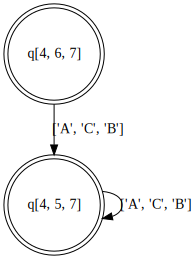

In [45]:
temp = dfa_born(regex_to_NFA("[A-C]*")[0])
draw_DFA(temp,'Prueba_dibujado_DFA')

## Tokenizer

El tokenizer lee la cadena de caracteres deseada, lleva dos contadores, uno que marca el inicio del token y otro que marca el final del token. Como en el libro "Compilers: Principles, Techniques, and Tools" se indica que un token exitoso es la cadena de caracteres más larga que se identifica como un token, por lo que el programa va aumentando el final del token hasta que la string leida no es aceptada por ningún DFA, es decir que en el paso anterior al no ser aceptada es cuando tenía su token correspondiente. Para saber si una cadena va a ser aceptada se le pregunta al DFA si en su nodo actual puede ir a otro nodo mediante el caracter de transición, si no es posible entonces la cadena jamás será aceptada.

In [46]:
#Tokenizer_new

#Tokenizer con impresiones
def tokenizar2(sample_text,dfas_list,tokenlist, flag = True):
  r = []
  if(len(sample_text) < 2):
    dfas_check(sample_text,dfas_list)
  x_1 = 0
  x_2 = 1

  #se recorre el string con una posición adelantada para verificar la cadena más larga aceptada por un DFA
  while x_2 <= len(sample_text):
    temp = dfas_try(sample_text[x_1:x_2],dfas_list)
    while len(temp) != 0 and x_2 <= len(sample_text)+1:
      #verifique si la porción de string que lleva es aceptada por un DFA
      temp = dfas_try(sample_text[x_1:x_2],dfas_list)
      x_2+=1
    #una vez que ya no lo acepta significa que debe ir a la ultima porción de string que corresponde a un token
    x_2 = x_2-2
    temp2 = dfas_check(sample_text[x_1:x_2], dfas_list)
    if len(temp2) != 0 :
      #si la cadena es aceptada por un DFA se confirma que es un token y se imprime
      if(flag == True):
        print("Tipo de token: ", tokenlist[min(temp2)],"- Posición inicial: ", x_1+1,"- Posición final: ", x_2,"- valor: ", str(sample_text[x_1:x_2]))
      r.append([tokenlist[min(temp2)],x_1,x_2])
      x_1 = x_2
      x_2+=1
    else:
      if(flag == True):
        pass
        #print("Syntax error")
      return []
      #se retorna una lista de listas que lleva un token, donde empieza y donde acaba
  return r


## Lectura de archivos e inputs

Para leer los archivos .txt se remueven los saltos de línea y posteriormente se asignan los tokens a su expresión regular respectiva y finalmente se tokeniza un texto. Si existe un caracter invalido el programa deja de tokenizar y pide otro texto para tokenizar.

In [47]:
#lee el .txt linea por linea para generar los tokens y luego otro .txt donde está el texto a tokenizar
def recieve_txt_input(readme,readme2):
  tok_rx_list = []
  dfas_list = []
  tokenlist = []
  nfas_list = []
  tokgen = []
  with open(readme) as f:
      lines = f.readlines()

  for x in lines:
    y = x.replace("\n", "" )
    tokgen.append(y.split(" -> "))

  for x in tokgen:
    dfas_list.append(dfa_born(regex_to_NFA(x[1])[0]))
    tokenlist.append(x[0])

  with open(readme2) as f:
      lines = f.read()
      lines = lines.replace("\n", "")
      lines = lines.replace("\t", "")
  r = tokenizar2(lines,dfas_list,tokenlist)
  return r

#en caso de que solo se quiera generar los tokens sin verificar un .txt se usa esta
def gen_txt_tokens(readme):
  tok_rx_list = []
  dfas_list = []
  tokenlist = []
  nfas_list = []
  tokgen = []
  with open(readme) as f:
      lines = f.readlines()

  for x in lines:
    y = x.replace("\n", "" )
    tokgen.append(y.split(" -> "))

  for x in tokgen:
    dfas_list.append(dfa_born(regex_to_NFA(x[1])[0]))
    tokenlist.append(x[0])
  return(dfas_list,tokenlist)

In [48]:
#prompts para pedir input al usuario en caso de que se desee tokenizar algo sobre la marcha sin crear un .txt
def ask_for_tokenization(dfas_list,tokenlist):
  flag = True
  while flag == True :
    print("Por favor ingrese el texto para tokenizar (si quiere dejar de tokenizar escriba '==='): ")
    strtemp3 = input()

    if(strtemp3 == '==='):
      flag = False
    else:
      tokenizar2(strtemp3,dfas_list,tokenlist)

#prompt para pedir al usuario que genere los tokens sobre la marcha y luego compruebe texto sobre la marcha
def ask_for_tokens():
  tok_rx_list = []
  dfas_list = []
  tokenlist = []
  nfas_list = []

  flag = True
  while flag == True :
    print("Por favor ingrese el nombre de su token: ")
    strtemp = input()
    #print(strtemp + '\n')
    print("Por favor ingrese la expresión regular: ")
    strtemp2 = input()
    #print(strtemp + '\n')
    tok_rx_list.append([strtemp, strtemp2])
    print("¿Desea continuar agregando tokens? (y/n): ")
    if(input() != 'y'):
      flag = False

    for x in tok_rx_list:
      dfas_list.append(dfa_born(regex_to_NFA(x[1])[0]))
      tokenlist.append(x[0])
    ask_for_tokenization(dfas_list,tokenlist)


# Parte A

Aquí generamos los archivos .txt ya que no se guardan en la base de datos del colab, de esta forma al ejecutar esta linea aparece el archivo .txt, en este caso enseñamos el funcionamiento del programa mediante el ejemplo que proporciona el profesor en el taller.

In [49]:
%%writefile for.txt 
for -> (for)|(FOR)
identifier -> [_a-z][_a-z0-9]*
digit -> [0-9][0-9]*
space -> [ ]
equal -> =

Overwriting for.txt


In [50]:
%%writefile test_for.txt 
for a = 1
for pepito = 24

Overwriting test_for.txt


In [51]:
recieve_txt_input('for.txt','test_for.txt')
print("")

Tipo de token:  for - Posición inicial:  1 - Posición final:  3 - valor:  for
Tipo de token:  space - Posición inicial:  4 - Posición final:  4 - valor:   
Tipo de token:  identifier - Posición inicial:  5 - Posición final:  5 - valor:  a
Tipo de token:  space - Posición inicial:  6 - Posición final:  6 - valor:   
Tipo de token:  equal - Posición inicial:  7 - Posición final:  7 - valor:  =
Tipo de token:  space - Posición inicial:  8 - Posición final:  8 - valor:   
Tipo de token:  digit - Posición inicial:  9 - Posición final:  9 - valor:  1
Tipo de token:  for - Posición inicial:  10 - Posición final:  12 - valor:  for
Tipo de token:  space - Posición inicial:  13 - Posición final:  13 - valor:   
Tipo de token:  identifier - Posición inicial:  14 - Posición final:  19 - valor:  pepito
Tipo de token:  space - Posición inicial:  20 - Posición final:  20 - valor:   
Tipo de token:  equal - Posición inicial:  21 - Posición final:  21 - valor:  =
Tipo de token:  space - Posición inicia

# Lectura del formato JSON

Para verificar un archivo JSON se utilizan varios DFAs, basicamente de manera recursiva se pregunta si un archivo es JSON, este verifica si la primera posición es una llave izquierda y luego pregunta si es un identificador, seguido de dos puntos y luego un objeto que puede ser un string, un número, un booleano, un JSON o inclusive listas de los anteriores. Si se encuentra una coma luego de chequear esto, entonces vuelve a chequear, y así sucesivamente hasta chequear que todo el texto esté en formato JSON.

In [52]:
#Función simple que va quitando espacios entre tokens
def skip_space(tokenlist,pos):
  temp = pos
  if(pos >= len(tokenlist)):
    return pos-1
  while tokenlist[pos][0] == 'Space':
    pos+=1
  return pos

#Esta función verifica si el simbolo esperado está en la posición deseada
def validate_JSON(tokenlist,pos,expected=None,not_expected=None,condition=None):
  if (expected is not None and tokenlist[pos][0] == expected or not_expected is not None and tokenlist[pos][0] != not_expected or condition is True):
    return True
  else:
    return False

#La columna vertebral del parser, acá se llama recursivamente al string para verificar los tokens
def JSON_parser(tokenlist,pos=0):
  if tokenlist[pos][0] == 'Left Key':
    return parse_object(tokenlist,pos)
  elif tokenlist[pos][0] == 'Left Bracket':
    return parse_array(tokenlist,pos)
  elif (tokenlist[pos][0] == 'Number' or tokenlist[pos][0] == 'String' or tokenlist[pos][0] =='Bool' or tokenlist[pos][0] == 'Null'):
    return pos
  return False

#Acá verificamos la estructura del JSON
def parse_object(tokenlist,pos):
  if not validate_JSON(tokenlist,pos,expected='Left Key'):
    return False
  pos = skip_space(tokenlist,pos+1)

  while tokenlist[pos][0] != 'Right Key':
    if tokenlist[pos][0] == 'String':
      pos+=1
      if tokenlist[pos][0] == 'Double dot':
        pos+=1
      else:
        return False
    pos = skip_space(tokenlist,pos)
    if(JSON_parser(tokenlist,pos) == False):
      return False
    pos = JSON_parser(tokenlist,pos)+1
    pos = skip_space(tokenlist,pos)
    if tokenlist[pos][0] == 'Comma':
      pos = skip_space(tokenlist,pos+1)
      if not validate_JSON(tokenlist,pos,not_expected='Right Key'):
        return False
    else:
      if not validate_JSON(tokenlist,pos,expected='Right Key'):
        return False
  return pos

#Acá verificamos la estructura Array
def parse_array(tokenlist,pos):
  if not validate_JSON(tokenlist,pos,expected='Left Bracket'):
    return False
  pos = skip_space(tokenlist,pos+1)

  while tokenlist[pos][0] != 'Right Bracket':
    if(JSON_parser(tokenlist,pos) == False):
      return False
    pos = JSON_parser(tokenlist,pos)+1
    pos = skip_space(tokenlist,pos)
    if tokenlist[pos][0] == 'Comma':
      pos = skip_space(tokenlist,pos+1)
      if not validate_JSON(tokenlist,pos,not_expected='Right Bracket'):
        return False
    else:
      if not validate_JSON(tokenlist,pos,expected='Right Bracket'):
        return False
  return pos

#Acá verificamos el caso en que haya más de un JSON en el archivo
def parse_multipleJSON(tokenlist,pos=0):
  if(len(tokenlist) < 1):
    return False
  if (JSON_parser(tokenlist,pos) == False):
    return False
  pos = JSON_parser(tokenlist,pos)+1
  while pos < len(tokenlist):
    pos = skip_space(tokenlist,pos)
    if tokenlist[pos][0] == 'Comma':
      pos+=1
      pos = skip_space(tokenlist,pos)
    else:
      return False
    if (JSON_parser(tokenlist,pos) == False):
      return False
    pos = JSON_parser(tokenlist,pos)+1

  return pos

# Parte B

Se desea leer el formato JSON, es decir que vamos a crear un token por cada elemento clave que lo compone. Lo primero es ser capaz de identificar las llaves "{}", luego de esto tenemos que comprobar el contenido de JSON que tiene la siguiente estructura: "String":objeto. Objeto es un elemento recursivo que puede ser desde un "JSON", números, identificadores, booleanos o null, además de una lista de los anteriores. Si al final de chequear el contenido se encuentra una coma, significa que hay que seguir comprobando más contenido.

Los DFA creados son los siguientes:


*   String -> "[ a-zA-Z0-9]+", es decir una cadena de letras o números encerrados entre comillas.
*   Number -> ([0-9]+)|([0-9]+.[0-9]+), es decir un entero o un flotante.
*   Bool -> (True)|(False), es decir falso o verdadero.
*   Null -> (Null)|(null)|(NULL), es decir las diferentes formas de escribir elemento nulo.
*   Left Key -> {, es decir la llave izquierda.
*   Right Key -> }, es decir la llave derecha.
*   Left Bracket -> \[, es decir el bracket izquierdo.
*   Right Bracket -> \], es decir el bracket derecho.
*   Double dot -> :, es decir los dos puntos que van luego del String.
*   Comma -> ,, es decir la coma que separa elementos en la lista o dentro del JSON.
*   Space -> [ ], es decir el espaco que se puede utilizar por comodidad para entender mejor el texto.

Ahora vamos a probar con el ejemplo del taller:



In [53]:
%%writefile json.txt
String -> "[ a-zA-Z0-9]+"
Number -> ([0-9]+)|([0-9]+.[0-9]+)
Bool -> (True)|(False)
Null -> (Null)|(null)|(NULL)
Left Key -> {
Right Key -> }
Left Bracket -> \[
Right Bracket -> \]
Double dot -> :
Comma -> ,
Space -> [ ]

Overwriting json.txt


In [54]:
%%writefile json_definitetest.txt
{
"departamento":8,
"nombredepto":"Ventas",
"director": "Juan Rodriguez",
"empleados":[
  {
    "nombre":"Pedro",
    "apellido":"Fernandez"
  },{
      "nombre":"Jacinto",
      "apellido":"Benavente"
    }
  ]
},{
  "Para que vea":"profe",
  "Float":9.8
}

Overwriting json_definitetest.txt


In [55]:
diosporfavor = recieve_txt_input('json.txt','json_definitetest.txt')
if(parse_multipleJSON(diosporfavor) == False):
  print("No es un archivo en formato JSON")
else:
  print("Es un archivo en formato JSON")

Tipo de token:  Left Key - Posición inicial:  1 - Posición final:  1 - valor:  {
Tipo de token:  String - Posición inicial:  2 - Posición final:  15 - valor:  "departamento"
Tipo de token:  Double dot - Posición inicial:  16 - Posición final:  16 - valor:  :
Tipo de token:  Number - Posición inicial:  17 - Posición final:  17 - valor:  8
Tipo de token:  Comma - Posición inicial:  18 - Posición final:  18 - valor:  ,
Tipo de token:  String - Posición inicial:  19 - Posición final:  31 - valor:  "nombredepto"
Tipo de token:  Double dot - Posición inicial:  32 - Posición final:  32 - valor:  :
Tipo de token:  String - Posición inicial:  33 - Posición final:  40 - valor:  "Ventas"
Tipo de token:  Comma - Posición inicial:  41 - Posición final:  41 - valor:  ,
Tipo de token:  String - Posición inicial:  42 - Posición final:  51 - valor:  "director"
Tipo de token:  Double dot - Posición inicial:  52 - Posición final:  52 - valor:  :
Tipo de token:  Space - Posición inicial:  53 - Posición fi

### Punto adicional

En esta parte se gráfican los DFA que sirven para tokenisar el JSON

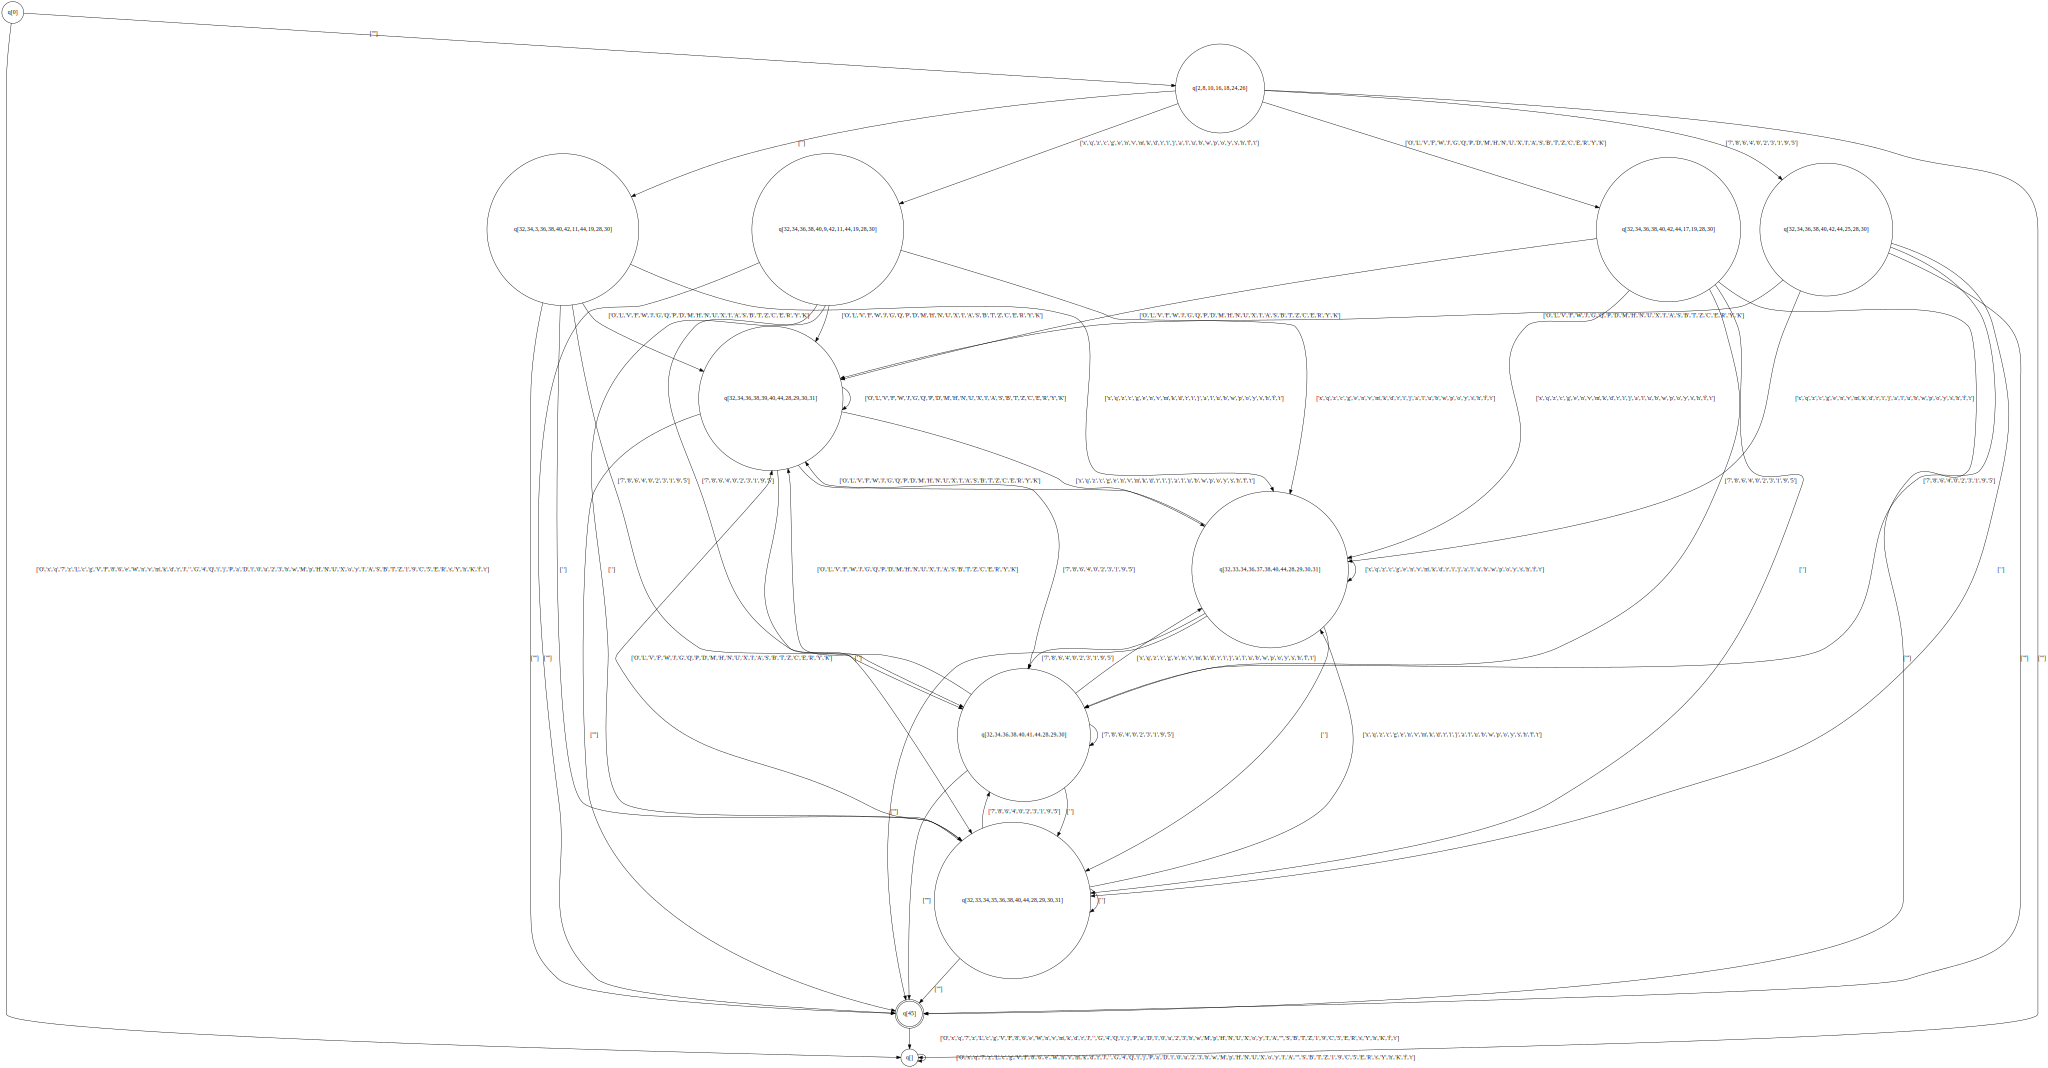

In [56]:
info = dfa_born(regex_to_NFA('"[ a-zA-Z0-9]+"')[0])
draw_DFA(info, "regex String_DFA")

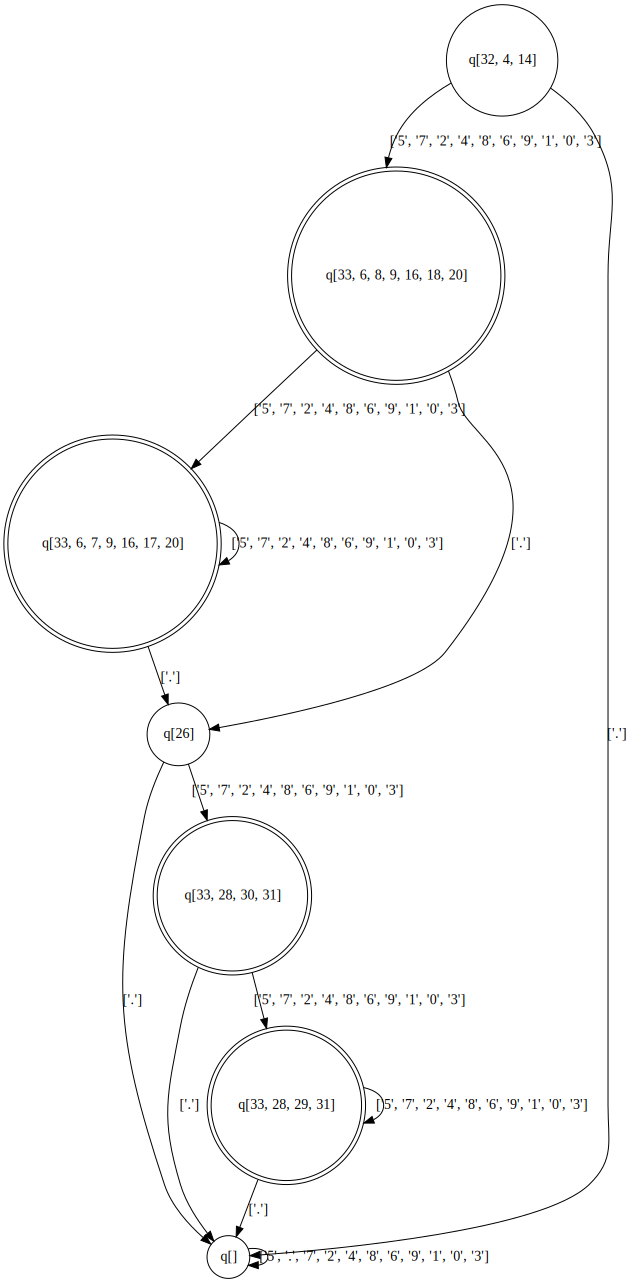

In [57]:
info = dfa_born(regex_to_NFA('([0-9]+)|([0-9]+.[0-9]+)')[0])
draw_DFA(info, "regex Number_DFA")

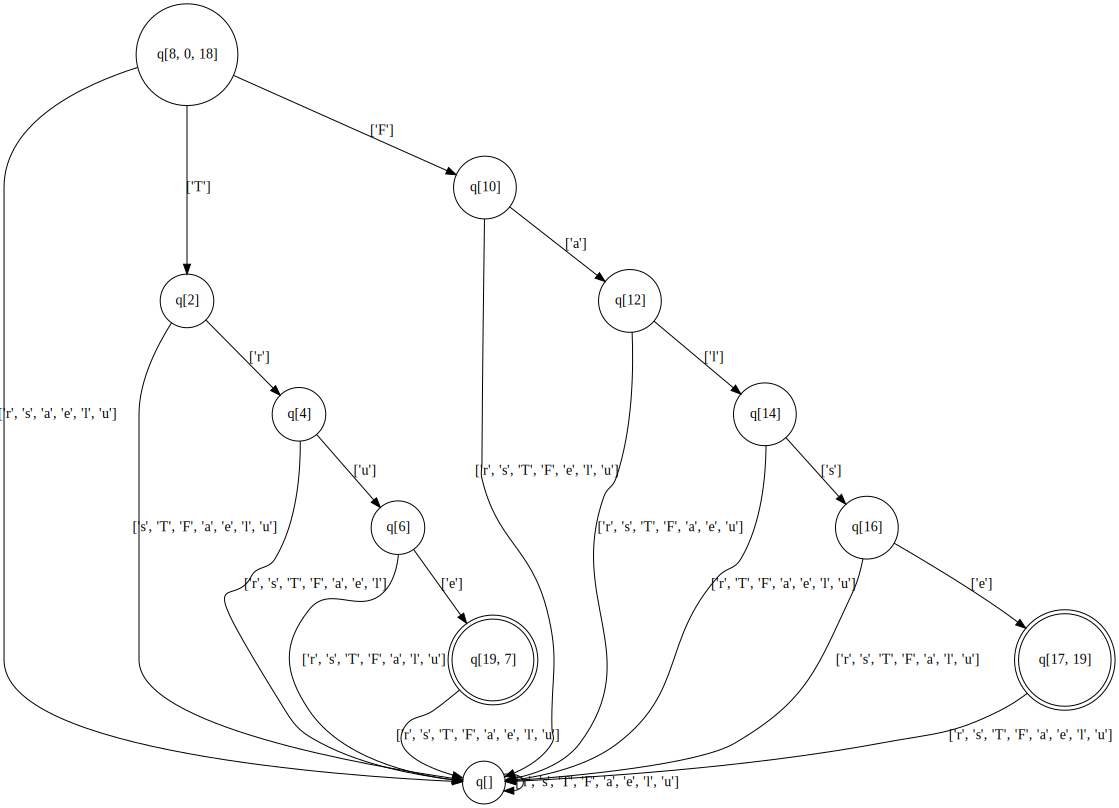

In [58]:
info = dfa_born(regex_to_NFA('(True)|(False)')[0])
draw_DFA(info, "regex Bool_NFA")


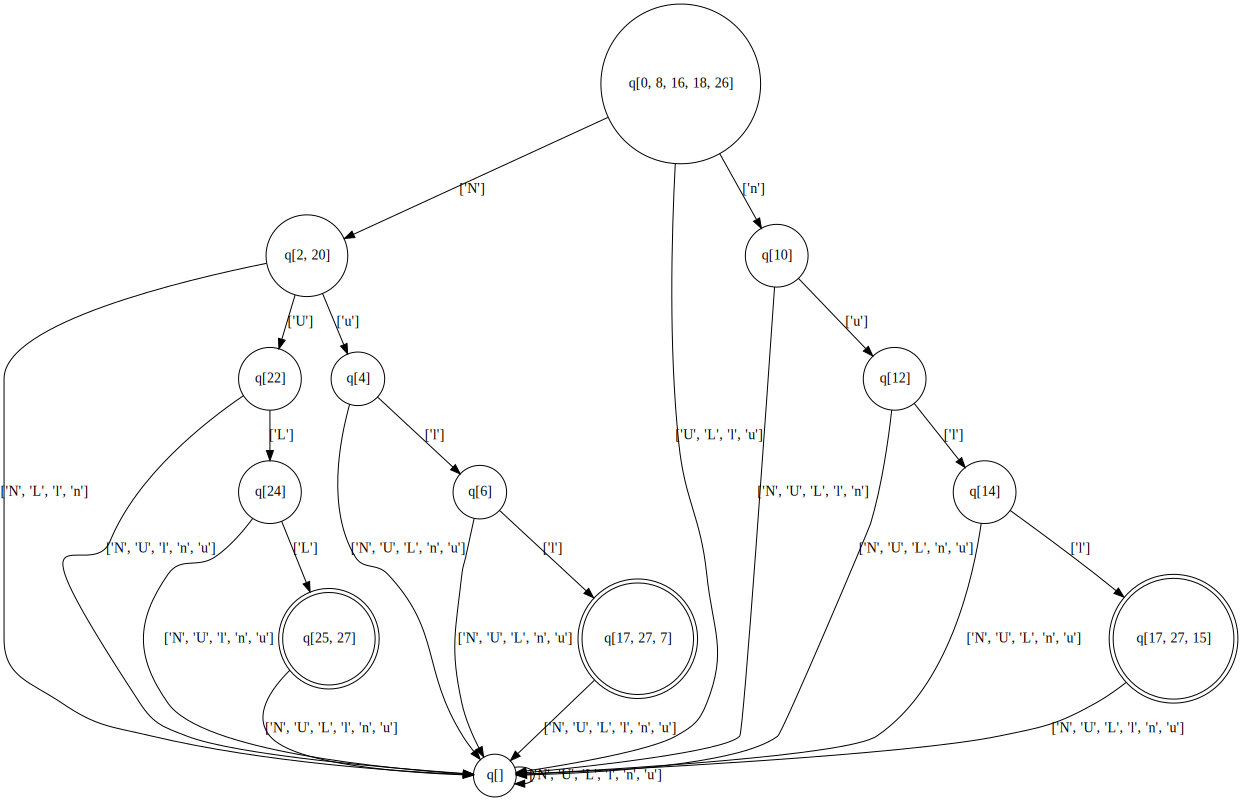

In [59]:
info = dfa_born(regex_to_NFA('(Null)|(null)|(NULL)')[0])
draw_DFA(info,"regex Null_DFA")

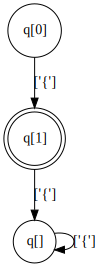

In [60]:
info = dfa_born(regex_to_NFA('{')[0])
draw_DFA(info,"regex Left_Key_DFA")

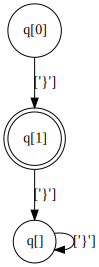

In [61]:
info = dfa_born(regex_to_NFA('}')[0])
draw_DFA(info,"regex Right_Key_DFA")

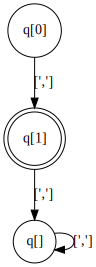

In [62]:
info = dfa_born(regex_to_NFA(',')[0])
draw_DFA(info,"regex Comma_DFA")

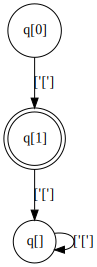

In [63]:
info = dfa_born(regex_to_NFA('\[')[0])
draw_DFA(info,"regex Left_Bracket_DFA")

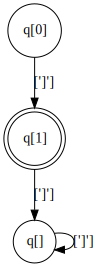

In [64]:
info = dfa_born(regex_to_NFA('\]')[0])
draw_DFA(info,"regex Right_Bracket_DFA")

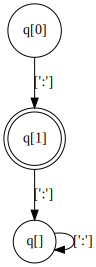

In [65]:
info = dfa_born(regex_to_NFA(':')[0])
draw_DFA(info,"regex Double_Dot_DFA")

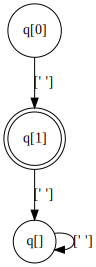

In [66]:
info = dfa_born(regex_to_NFA('[ ]')[0])
draw_DFA(info,"regex Space_DFA")

# Parte C

## Tokenización por subpalabras (subwords):

El concepto principal de la tokenización por subpalabras es que las palabras que ocurren frecuentemente deberían estar en el vocabulario, mientras que las palabras poco frecuentes deberian ser separadas en subpalabras más frecuentes. Por ejemplo: "refactoring" se puede separar entre "re", "factor" e "ing". Dichas subpalabras ocurren más frecuentemente que la palabra "refactoring" y su significado se mantiene intacto.

Existen 3 principales tokenizers de subpalabras:

### Codificación de pares de bytes (Byte Pair Encoding):

El primer paso en BPE es separar todas las strings en palabras. Se puede utilizar cualquier tokenizer para este paso, por ejemplo usar la regla basada en un tokenizer basado en espacios y puntuación.

Luego de tokenizar se tendrá una lista de palabras con su respectiva frecuencias, el tamaño del vocabulario deseado es un parametro para BPE. Todos los caracteres únicos y los simbolos en las palabras son incluidos en el vocabulario base.

Luego todas las palabras se separan en sus caracteres del vocabulario base. Después de eso el BPE cuenta las ocurrencias de cada pareja de simbolos y selecciona aquella que tiene la mayor frecuencia. Dicha pareja es agregada en el vocabulario y todas las ocurrencias de esa pareja se concatenan. 

Se repite el proceso anterior con todas las parejas de caracteres hasta alcanzar el tamaño deseado de vocabulario. Fonalmente retorna el input tokenizado.

Como el BPE ya está entrenado, ahora va a tokenizar las siguientes palabras con el vocabulario que encontró previamente.

### Tokenización WordPiece

Similar al metodo anterior se utilizan parejas, sin embargo en este tokenizer elige aquella que maximiza la probabilidad de los datos de entrenamiento. Esto significa que entrena un modelo de lenguaje comenzando con un bocabulario base y selecciona la pareja con la mayor probabilidad (pareja = caracter en el vocabulario base + el caracter con la mayor probabilidad de ser generado). Esa pareja es agregada al vocabulario y el modelo de lenguaje se entrena de nuevo con este nuevo vocabulario. Esto se repite hasta llegar al vocabulario deseado. 

### Tokenización Unigram

La tokenización Unigram también comienza con el tamaño de vocabulario deseado. Sin embargo la mayor diferencia entre Unigram y los anteriores 2 metodos es que no empieza con un vocabulario base de únicamente caracteres. Envés de eso el vocabulario tiene todas las palabras y simbolos, y los tokens son gradualmente removidos para llegar al vocabulario final.

La forma en que los tokens son removidos es un elemento clave de la tokenización unigram. Utiliza un modelo de lenguaje en cada paso y va removiendo x% de la pareja (la definición de pareja es la misma que en WordPiece) que tiene la mayor perdida. La perdida es generalmente definida como el logaritmo de probabilidad sobre el vocabulario en el paso de entrenamiento.

Unigram es mayormente utilizado en conjunción con SentencePiece.

### SentencePiece

Todos los tokenizers previos asumen que los espacios separan palabras, esto es cierto excepto para algunos casos como el Chino, Japonés, entre otros. SentencePiece no trata los espacios como un separador, envés de eso toma el string como input en su formato crudo original, es decir junto con los espacios. Luego utiliza BPE o Unigram como tokenizer para construir su vocabulario.

## Diferencias de las estrategias y los parsers basados en lenguaje natural.

Lo primero es aclarar que la tokenización por subpalabras es el padre de la jerarquía, es decir BPE y Unigram son tokenizadores por subpalabras pero no todos los tokenizadores por subpalabras son BPE o Unigram. Es interesante notar que los tokenizadofres usan otro tokenizadores dentro de sus procesos, pues lo que realmente diferencia a Unigram con BPE es el proceso de la división de las palabras. Es decir que existe antes un proceso de tokenización que separa las palabras como las conocemos, sin espacios y sin signos de puntuación, o por el contrario teniendo esos simbolos en cuenta como otro metodo de tokenización.

La principal diferencia entrew BPE y Unigram es que no empieza el proceso únicamente con un vocabulario de caracteres, es decir es como empezar por un final general y empezar a recortar para llevar al vocabulario deseado. Por otro lado en BPE se van construyendo las parejas hasta llegar al vocabulario objetivo.